In [1]:
import numpy as np
import matplotlib.pyplot as plt

class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.set_temperature(temperature)
        self.state = np.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0
        self.total_flips = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)
        self.cluster_prob = 1 - np.exp(-2 * self.J / (self.temperature * self.kB))

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            np.roll(self.state, 1, axis=0) +
            np.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cluster update of the model state.
        '''
        # Pick a random cell to start the cluster
        i, j = np.random.randint(self.size, size=2)
        cell_value = self.state[i, j]
        cluster = {(i, j)}
        pocket = [(i, j)]

        while len(pocket) > 0:
            # Get a random cell from the pocket
            i, j = pocket.pop(np.random.randint(0, len(pocket)))
            # Check whether to add any of the cell's neighbors to the cluster
            for u, v in [
                ((i - 1) % self.size, j),
                ((i + 1) % self.size, j),
                (i, (j - 1) % self.size),
                (i, (j + 1) % self.size)
            ]:
                if (
                    (self.state[u, v] == cell_value) and
                    ((u, v) not in cluster) and
                    (np.random.uniform(0, 1) < self.cluster_prob)
                ):
                    pocket.append((u, v))
                    cluster.add((u, v))
        # Flip all cells in the cluster
        for (i, j) in cluster:
            self.state[i, j] = -cell_value
        self.step += 1
        self.total_flips += len(cluster)

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Updates: ' + str(self.step) + '. Flips: ' + str(self.total_flips) + '. M = ' + str(self.average_magnetism()))

In [2]:
# Animate at different temperatures
def ising_animation(temperature, size, frames, updates_per_frame):
    sim = IsingSimulation(size, temperature)
    for _ in range(frames):
        for _ in range(updates_per_frame):
            sim.update()
        sim.display()
        plt.title('Updates: ' + str(sim.step) + '. Cells flipped: ' + str(sim.total_flips) + '.')

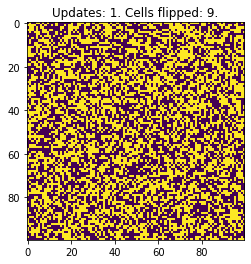

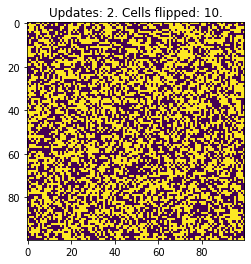

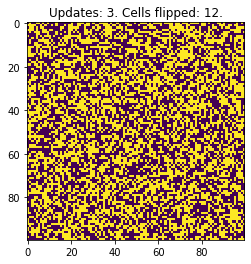

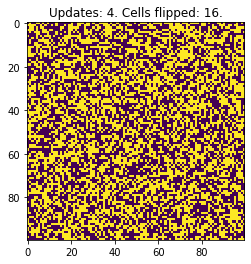

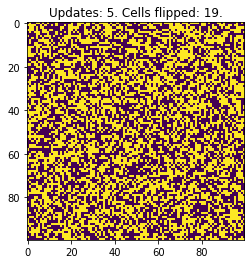

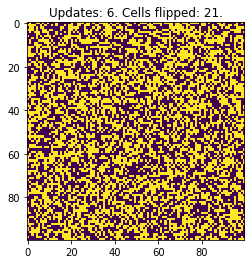

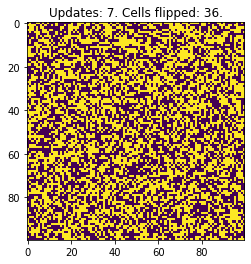

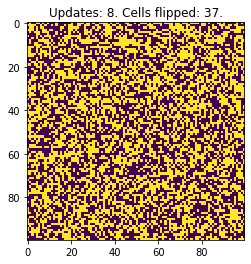

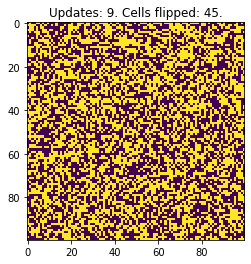

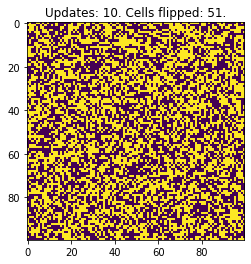

In [3]:
# Create a simulation at the critical temperature
ising_animation(
    temperature=1043,
    size=100,
    frames=10,
    updates_per_frame=1)

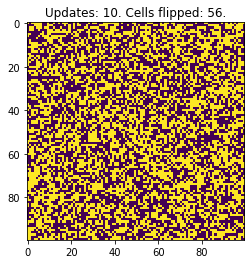

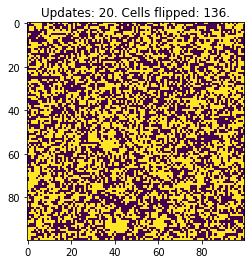

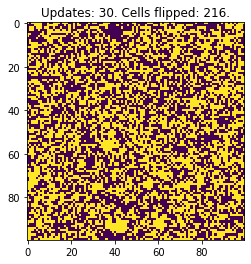

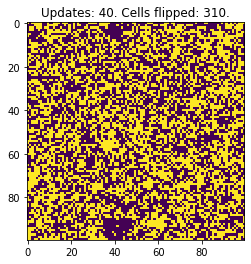

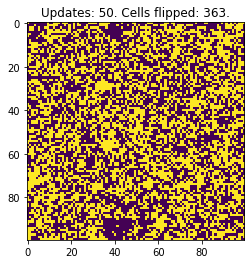

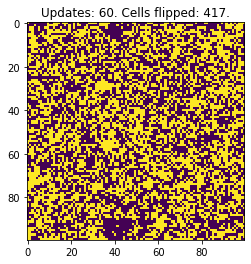

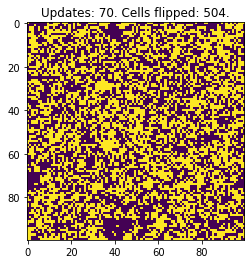

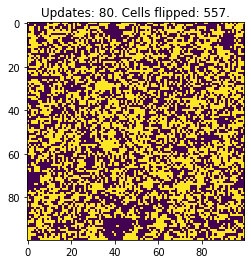

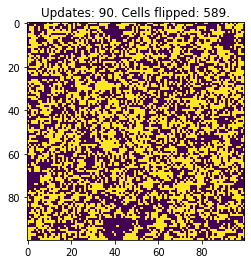

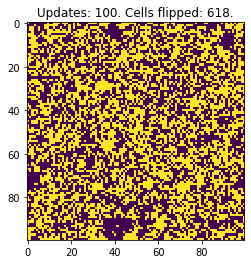

In [4]:
# Create a simulation at the critical temperature
ising_animation(
    temperature=1043,
    size=100,
    frames=10,
    updates_per_frame=10)

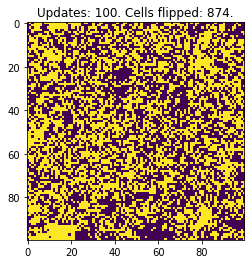

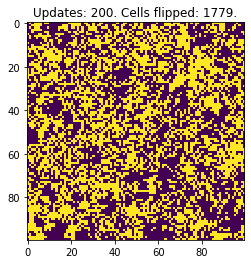

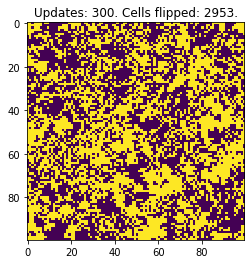

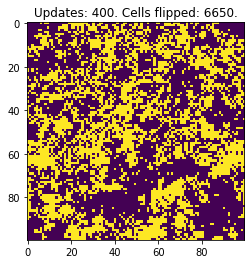

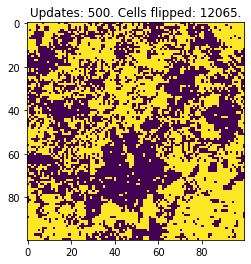

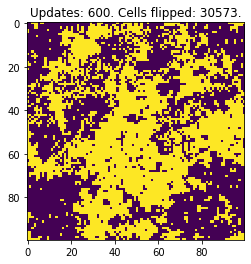

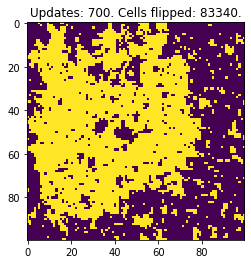

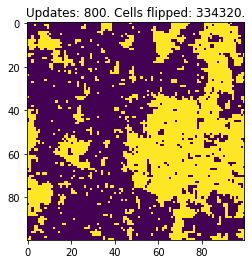

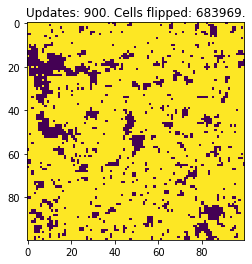

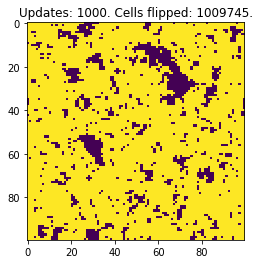

In [5]:
# Create a simulation at the critical temperature
ising_animation(
    temperature=1043,
    size=100,
    frames=10,
    updates_per_frame=100)